In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\AICTE\Air Quality Index Prediction\air quality data.csv")
df.head(100)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ahmedabad,2015-04-06,120.96,NaN,4.23,20.86,25.02,NaN,4.23,35.54,35.66,6.05,15.85,1.68,303.0,Very Poor
96,Ahmedabad,2015-04-07,138.63,NaN,5.65,25.47,30.67,NaN,5.65,87.43,29.77,11.25,24.67,3.12,314.0,Very Poor
97,Ahmedabad,2015-04-08,144.36,NaN,15.82,30.69,46.10,NaN,15.82,66.39,27.34,17.22,49.56,7.71,378.0,Very Poor
98,Ahmedabad,2015-04-09,85.03,NaN,3.30,26.70,27.41,NaN,3.30,59.16,35.89,7.58,29.19,4.08,415.0,Severe


In [3]:
df.shape

(29531, 16)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data after standardization:\n", df.head())


Data after standardization:
         City        Date  PM2.5  PM10        NO       NO2       NOx  NH3  \
0  Ahmedabad  2015-01-01    NaN   NaN -0.730938 -0.422511 -0.479031  NaN   
1  Ahmedabad  2015-01-02    NaN   NaN -0.728744 -0.525885 -0.500835  NaN   
2  Ahmedabad  2015-01-03    NaN   NaN -0.007668 -0.378383 -0.082449  NaN   
3  Ahmedabad  2015-01-04    NaN   NaN -0.696706 -0.411888 -0.453119  NaN   
4  Ahmedabad  2015-01-05    NaN   NaN  0.198604 -0.291762  0.172249  NaN   

         CO       SO2        O3   Benzene   Toluene    Xylene  AQI AQI_Bucket  
0 -0.190815  0.722865  4.557310 -0.207506 -0.434729 -0.485551  NaN        NaN  
1 -0.183634  0.552462 -0.019887  0.025246 -0.160299  0.110687  NaN        NaN  
2  2.176063  0.801725 -0.174765  0.222579  0.385555 -0.129706  NaN        NaN  
3 -0.078790  0.223787  0.073225  0.072682  0.072064 -0.327398  NaN        NaN  
4  2.851083  1.367531  0.222110  0.235861  0.510250 -0.045885  NaN        NaN  


In [5]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
# Assume data is recorded daily and starts from a known date
start_date = "2023-01-01"
df["timestamp"] = pd.date_range(start=start_date, periods=len(df), freq="D")

print(df.head())

        City        Date  PM2.5  PM10        NO       NO2       NOx  NH3  \
0  Ahmedabad  2015-01-01    NaN   NaN -0.730938 -0.422511 -0.479031  NaN   
1  Ahmedabad  2015-01-02    NaN   NaN -0.728744 -0.525885 -0.500835  NaN   
2  Ahmedabad  2015-01-03    NaN   NaN -0.007668 -0.378383 -0.082449  NaN   
3  Ahmedabad  2015-01-04    NaN   NaN -0.696706 -0.411888 -0.453119  NaN   
4  Ahmedabad  2015-01-05    NaN   NaN  0.198604 -0.291762  0.172249  NaN   

         CO       SO2        O3   Benzene   Toluene    Xylene  AQI AQI_Bucket  \
0 -0.190815  0.722865  4.557310 -0.207506 -0.434729 -0.485551  NaN        NaN   
1 -0.183634  0.552462 -0.019887  0.025246 -0.160299  0.110687  NaN        NaN   
2  2.176063  0.801725 -0.174765  0.222579  0.385555 -0.129706  NaN        NaN   
3 -0.078790  0.223787  0.073225  0.072682  0.072064 -0.327398  NaN        NaN   
4  2.851083  1.367531  0.222110  0.235861  0.510250 -0.045885  NaN        NaN   

   timestamp  
0 2023-01-01  
1 2023-01-02  
2 2023-01-0

In [7]:
# Creating pollutant ratio features
df['NO2_PM10_ratio'] = df['NO2'] / (df['PM10'] + 1)
df['CO_SO2_ratio'] = df['CO'] / (df['SO2'] + 1)

# Moving averages
df['PM2.5_MA_7'] = df['PM2.5'].rolling(window=7, min_periods=1).mean()
df['AQI_MA_7'] = df['AQI'].rolling(window=7, min_periods=1).mean()

print("Feature Engineering Done. Sample Data:\n", df.head())

Feature Engineering Done. Sample Data:
         City        Date  PM2.5  PM10        NO       NO2       NOx  NH3  \
0  Ahmedabad  2015-01-01    NaN   NaN -0.730938 -0.422511 -0.479031  NaN   
1  Ahmedabad  2015-01-02    NaN   NaN -0.728744 -0.525885 -0.500835  NaN   
2  Ahmedabad  2015-01-03    NaN   NaN -0.007668 -0.378383 -0.082449  NaN   
3  Ahmedabad  2015-01-04    NaN   NaN -0.696706 -0.411888 -0.453119  NaN   
4  Ahmedabad  2015-01-05    NaN   NaN  0.198604 -0.291762  0.172249  NaN   

         CO       SO2  ...   Benzene   Toluene    Xylene  AQI  AQI_Bucket  \
0 -0.190815  0.722865  ... -0.207506 -0.434729 -0.485551  NaN         NaN   
1 -0.183634  0.552462  ...  0.025246 -0.160299  0.110687  NaN         NaN   
2  2.176063  0.801725  ...  0.222579  0.385555 -0.129706  NaN         NaN   
3 -0.078790  0.223787  ...  0.072682  0.072064 -0.327398  NaN         NaN   
4  2.851083  1.367531  ...  0.235861  0.510250 -0.045885  NaN         NaN   

   timestamp NO2_PM10_ratio  CO_SO2_rati

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   City            29531 non-null  object        
 1   Date            29531 non-null  object        
 2   PM2.5           24933 non-null  float64       
 3   PM10            18391 non-null  float64       
 4   NO              25949 non-null  float64       
 5   NO2             25946 non-null  float64       
 6   NOx             25346 non-null  float64       
 7   NH3             19203 non-null  float64       
 8   CO              27472 non-null  float64       
 9   SO2             25677 non-null  float64       
 10  O3              25509 non-null  float64       
 11  Benzene         23908 non-null  float64       
 12  Toluene         21490 non-null  float64       
 13  Xylene          11422 non-null  float64       
 14  AQI             24850 non-null  float64       
 15  AQ

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

City                  0
Date                  0
PM2.5              4598
PM10              11140
NO                 3582
NO2                3585
NOx                4185
NH3               10328
CO                 2059
SO2                3854
O3                 4022
Benzene            5623
Toluene            8041
Xylene            18109
AQI                4681
AQI_Bucket         4681
timestamp             0
NO2_PM10_ratio    11446
CO_SO2_ratio       4307
PM2.5_MA_7         3838
AQI_MA_7           3454
dtype: int64

In [11]:
df.dropna(subset = ['AQI'], inplace = True)

In [12]:
df.isnull().sum().sort_values(ascending = False)

Xylene            15372
NO2_PM10_ratio     7344
PM10               7086
NH3                6536
Toluene            5826
Benzene            3535
NOx                1857
CO_SO2_ratio        990
O3                  807
PM2.5               678
SO2                 605
PM2.5_MA_7          512
CO                  445
NO2                 391
NO                  387
timestamp             0
City                  0
AQI_Bucket            0
AQI                   0
Date                  0
AQI_MA_7              0
dtype: int64

In [13]:
df.shape

(24850, 21)

In [14]:
df.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,timestamp,NO2_PM10_ratio,CO_SO2_ratio,PM2.5_MA_7,AQI_MA_7
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,2.485000e+04,24850,17506.000000,23860.000000,24338.000000,24850.000000
mean,0.000403,0.003613,0.002093,0.017068,-0.000636,0.014207,0.013884,-0.009322,0.019427,0.011247,0.041302,0.082011,-7.662996e-17,2062-07-27 08:51:08.909456896,-1.374808,-0.154785,0.002386,0.002035
min,-1.042537,-1.303462,-0.769999,-1.166558,-1.020974,-0.913948,-0.322947,-0.800840,-1.589409,-0.207506,-0.435731,-0.485551,-1.090763e+00,2023-01-29 00:00:00,-6171.091848,-1.352234,-1.025525,-1.083656
25%,-0.594656,-0.677128,-0.522911,-0.679107,-0.606696,-0.565477,-0.238210,-0.485401,-0.702548,-0.192959,-0.384275,-0.423872,-6.074440e-01,2043-03-08 06:00:00,-1.117410,-0.385305,-0.554457,-0.568860
50%,-0.288672,-0.242235,-0.336388,-0.263978,-0.272682,-0.279302,-0.189379,-0.292938,-0.149413,-0.125916,-0.256700,-0.260974,-3.444615e-01,2061-06-28 12:00:00,-0.172603,-0.252651,-0.263728,-0.318062
75%,0.208388,0.353802,0.107756,0.395490,0.248405,0.267740,-0.110387,0.033531,0.534171,0.003742,0.074067,0.166041,2.952257e-01,2080-07-01 18:00:00,0.442088,-0.102869,0.212962,0.287001
max,13.106827,8.818207,16.374747,13.632655,10.931479,12.825556,24.927107,9.460323,10.290098,28.572178,22.342418,26.459062,1.338038e+01,2103-11-08 00:00:00,5280.426967,23.930695,8.933107,11.909103
std,0.975491,0.987697,0.984013,1.006242,0.970532,1.007490,1.016150,0.961136,1.001384,1.014244,1.045691,1.068220,1.000020e+00,NaN,89.008221,0.729633,0.880915,0.907613


In [15]:
null_values_percentage = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = True)

In [16]:
null_values_percentage

City               0.000000
timestamp          0.000000
AQI_Bucket         0.000000
AQI                0.000000
AQI_MA_7           0.000000
Date               0.000000
NO                 1.557344
NO2                1.573441
CO                 1.790744
PM2.5_MA_7         2.060362
SO2                2.434608
PM2.5              2.728370
O3                 3.247485
CO_SO2_ratio       3.983903
NOx                7.472837
Benzene           14.225352
Toluene           23.444668
NH3               26.301811
PM10              28.515091
NO2_PM10_ratio    29.553320
Xylene            61.859155
dtype: float64

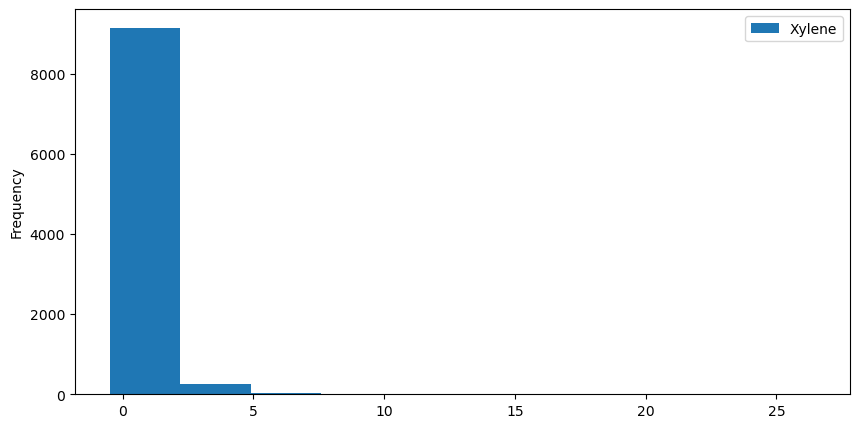

In [17]:
df['Xylene'].plot(kind = 'hist', figsize = (10,5))
plt.legend()
plt.show()

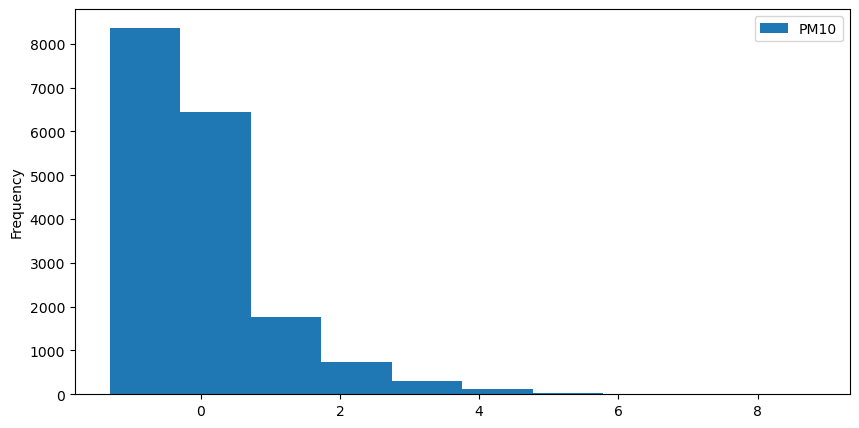

In [18]:
df['PM10'].plot(kind = 'hist', figsize = (10,5))
plt.legend()
plt.show()

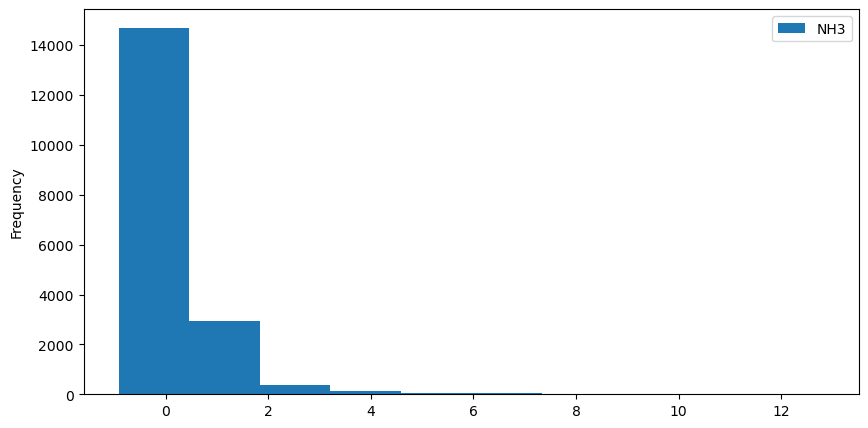

In [19]:
df['NH3'].plot(kind = 'hist', figsize = (10,5))
plt.legend()
plt.show()

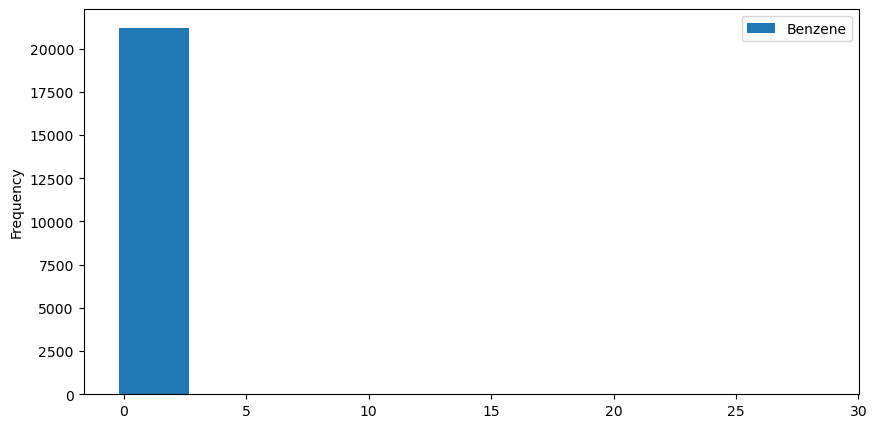

In [20]:
df['Benzene'].plot(kind = 'hist', figsize = (10,5))
plt.legend()
plt.show()

In [21]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'timestamp',
       'NO2_PM10_ratio', 'CO_SO2_ratio', 'PM2.5_MA_7', 'AQI_MA_7'],
      dtype='object')

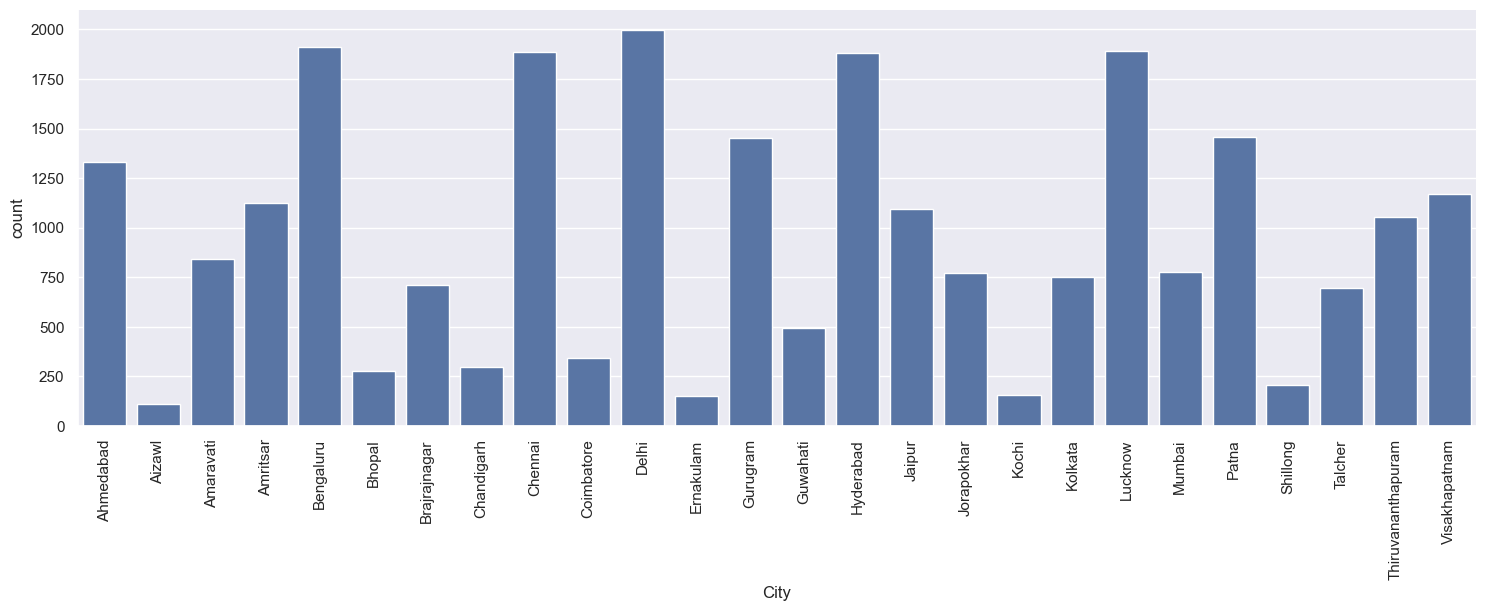

In [22]:
#BIVARIATE ANALYSIS
sns.set_theme(style = "darkgrid")
graph = sns.catplot(x = "City", kind = "count", data = df, height = 5, aspect = 3)
graph.set_xticklabels(rotation = 90)

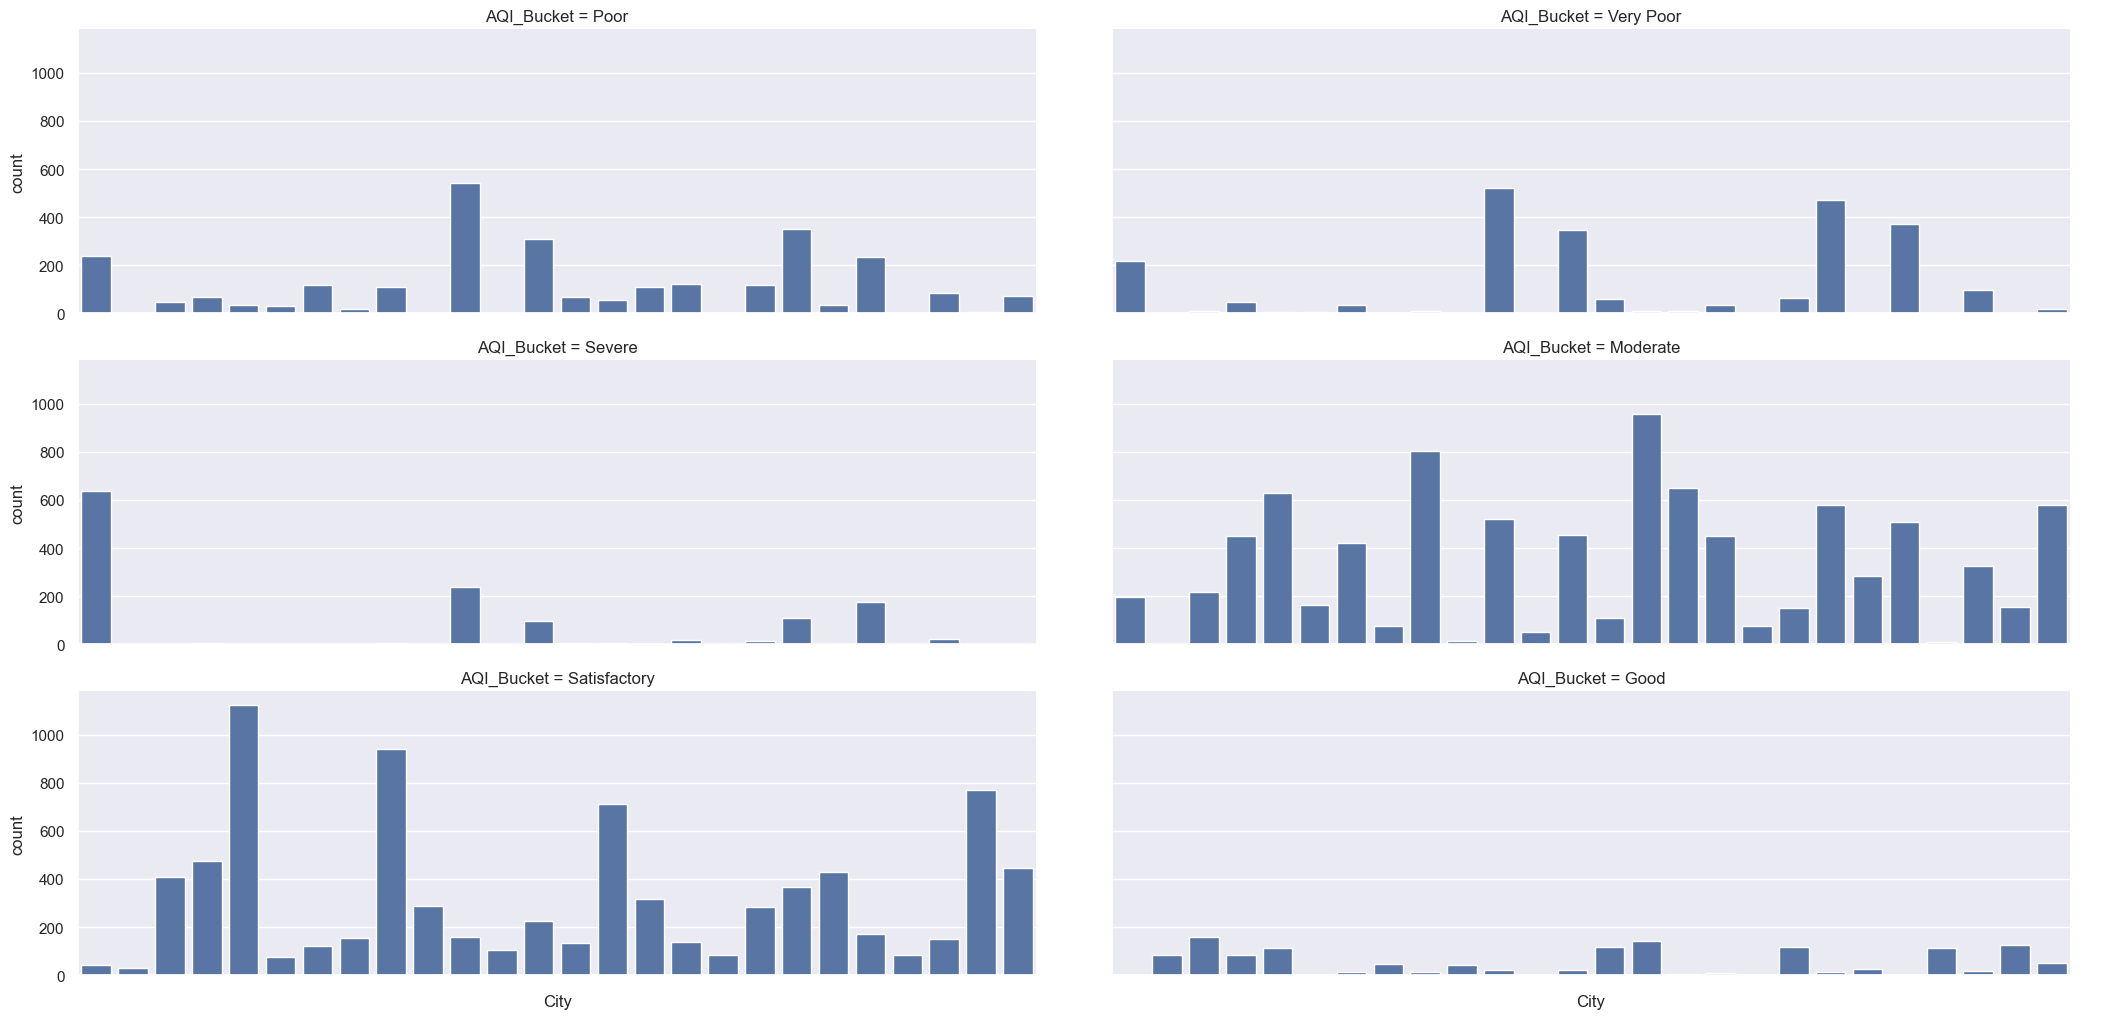

In [23]:
sns.set_theme(style = "darkgrid")
graph = sns.catplot(x = "City", kind = "count", data = df, col = "AQI_Bucket",col_wrap=2, height = 3.5, aspect = 3)
graph.set_xticklabels(rotation = 90)

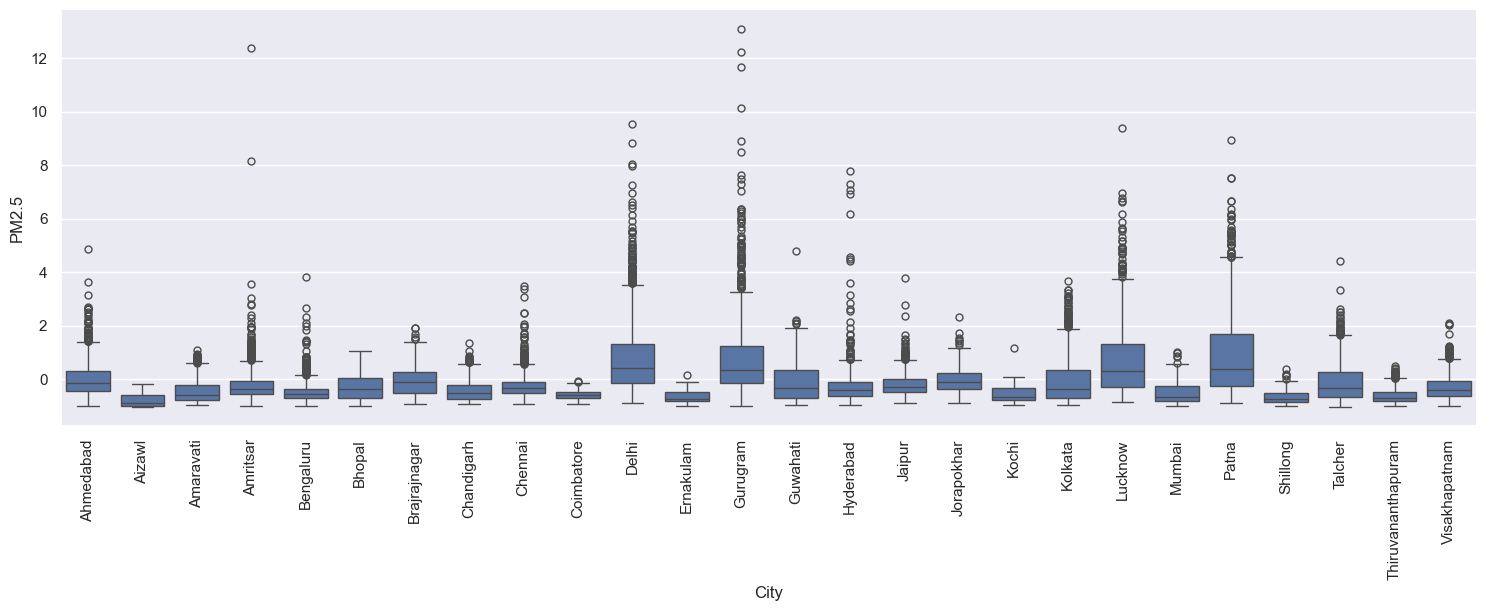

In [24]:
graph1 = sns.catplot(x = "City", y = "PM2.5", kind = 'box', data = df, height = 5, aspect = 3)
graph1.set_xticklabels(rotation = 90)

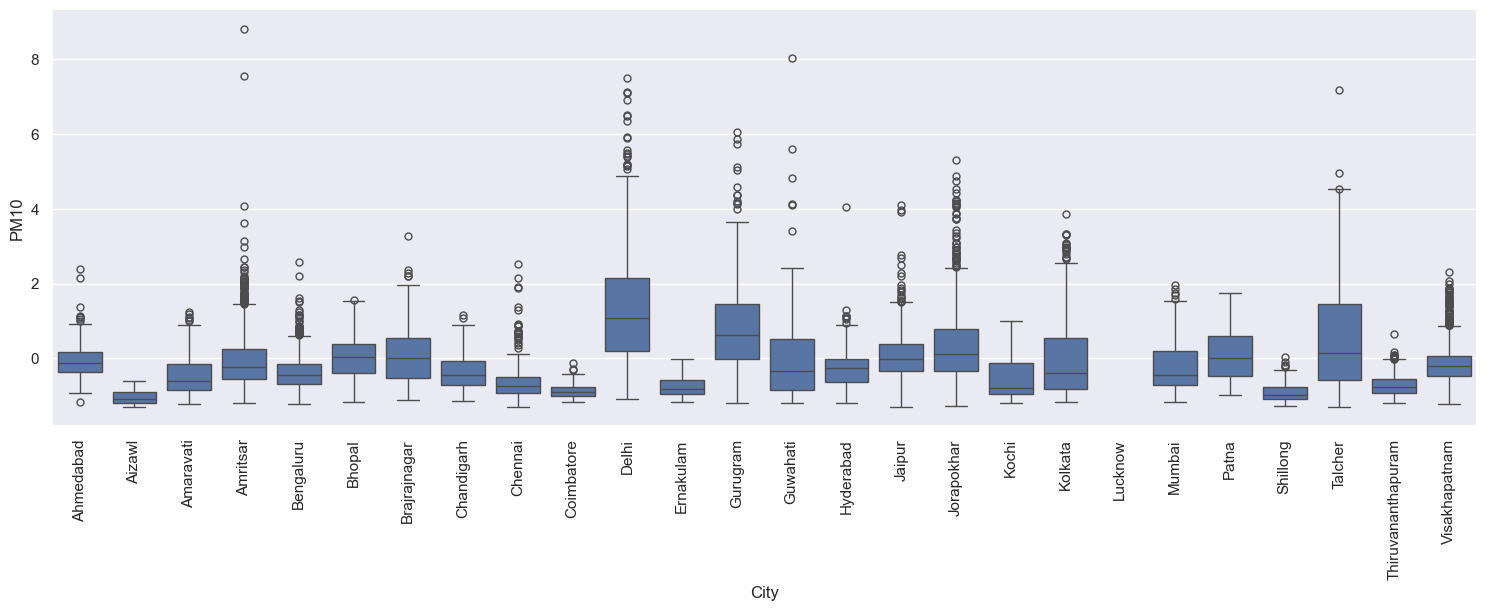

In [25]:
graph2 = sns.catplot(x = "City", y = "PM10", kind = 'box', data = df, height = 5, aspect = 3)
graph2.set_xticklabels(rotation = 90)

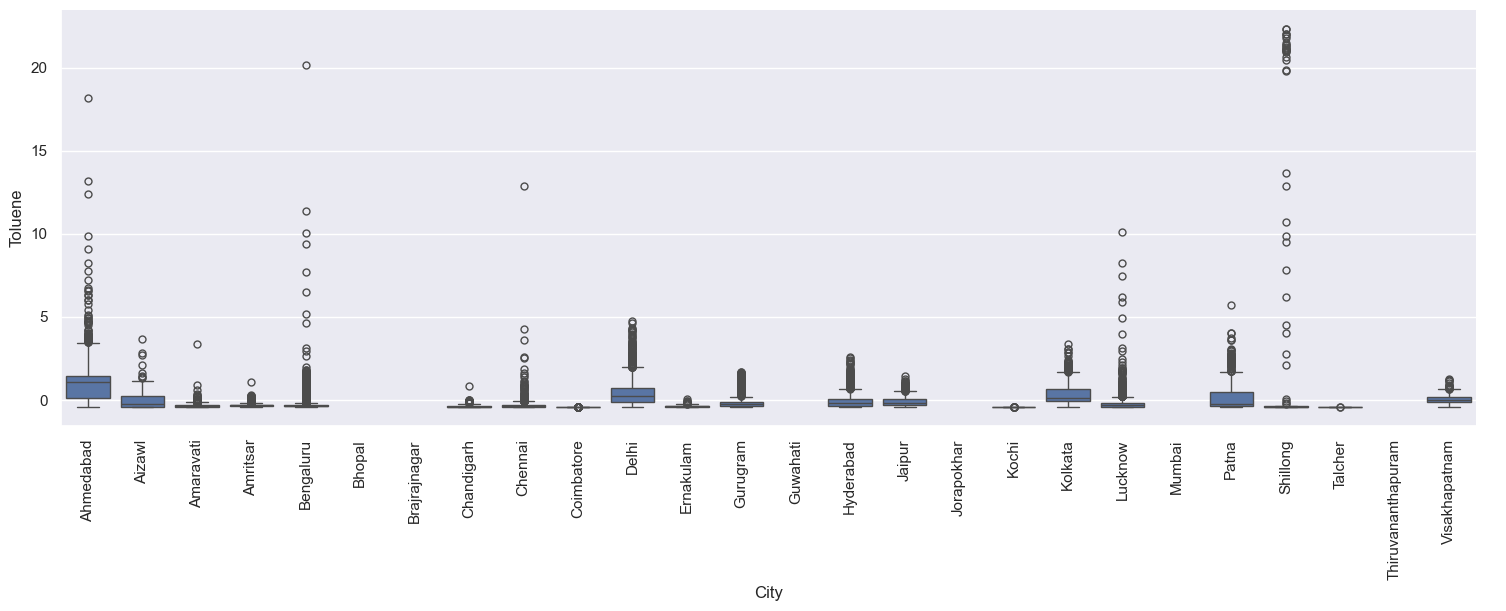

In [26]:
graph3 = sns.catplot(x = "City", y = "Toluene", kind = 'box', data = df, height = 5, aspect = 3)
graph3.set_xticklabels(rotation = 90)

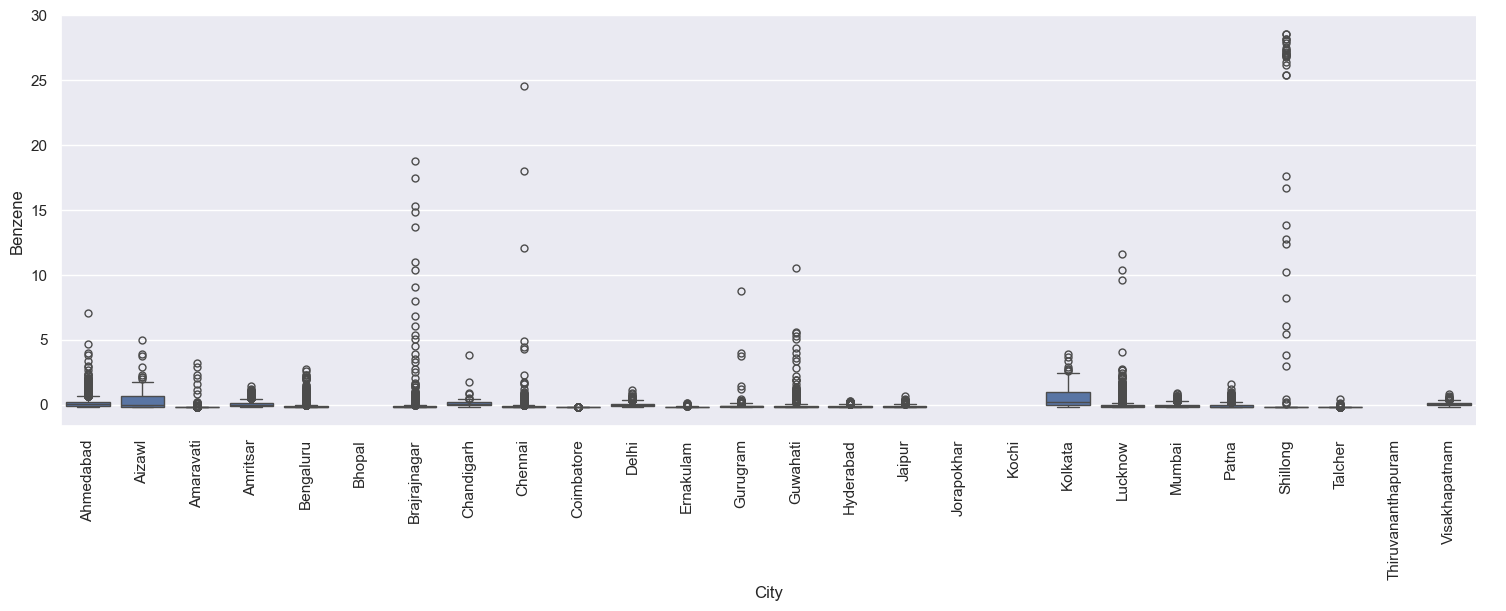

In [27]:
graph4 = sns.catplot(x = "City", y = "Benzene", kind = 'box', data = df, height = 5, aspect = 3)
graph4.set_xticklabels(rotation = 90)

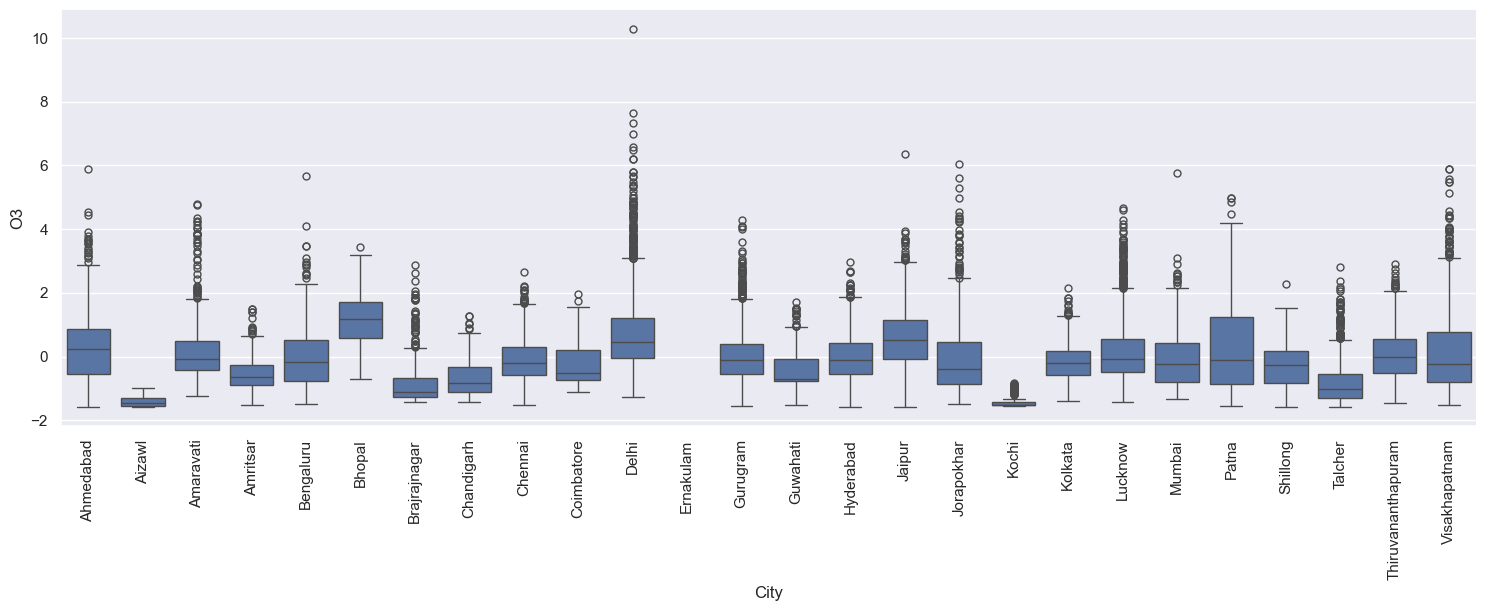

In [28]:
graph5 = sns.catplot(x = "City", y = "O3", kind = 'box', data = df, height = 5, aspect = 3)
graph5.set_xticklabels(rotation = 90)

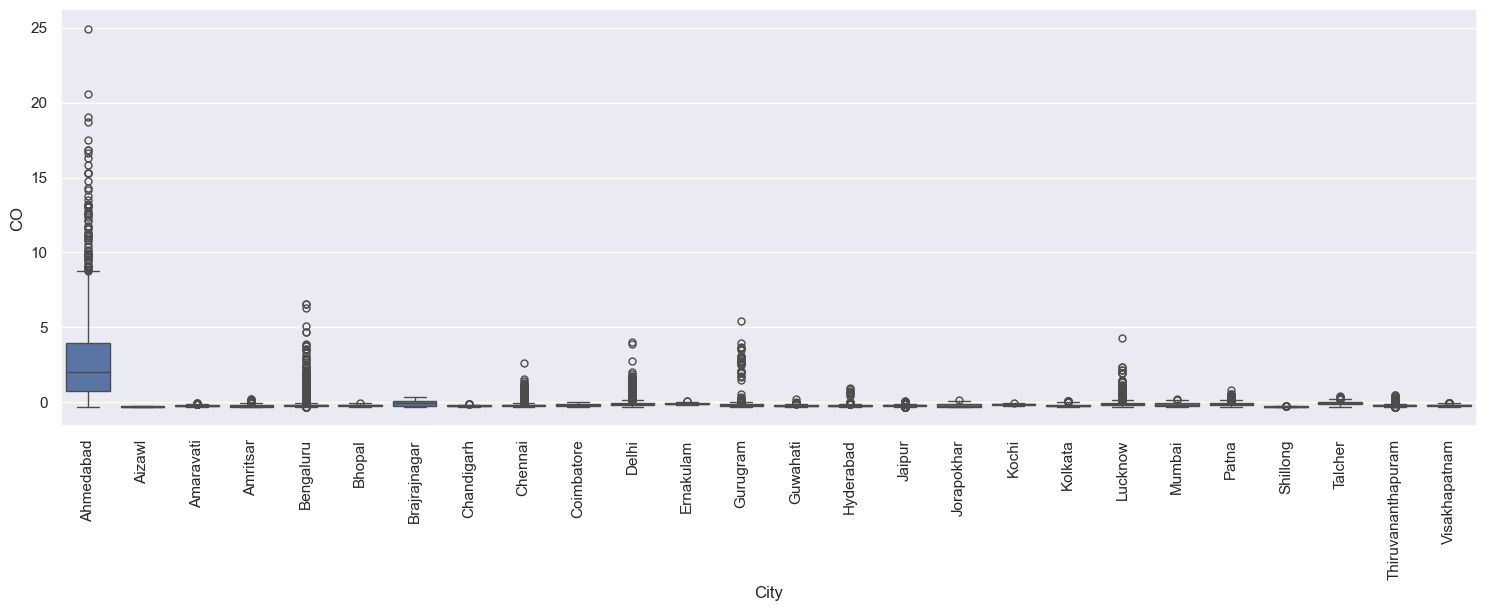

In [29]:
graph8 = sns.catplot(x = "City", y = "CO", kind = 'box', data = df, height = 5, aspect = 3)
graph8.set_xticklabels(rotation = 90)

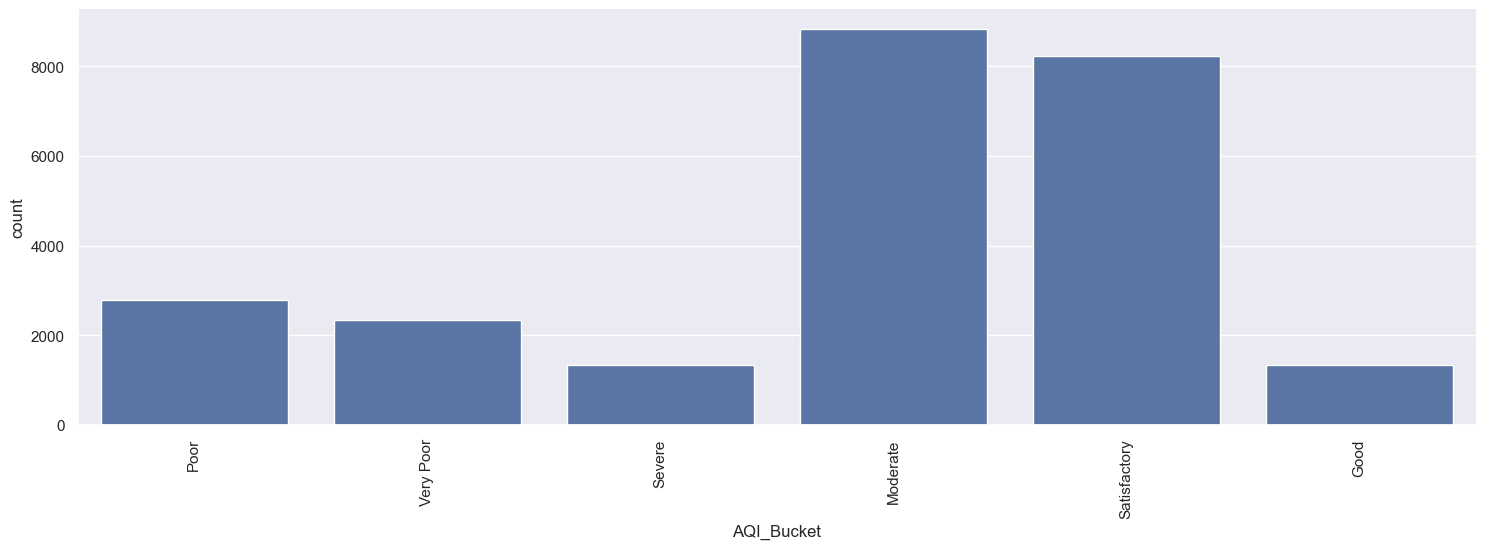

In [30]:
graph9 = sns.catplot(x = "AQI_Bucket", data=df, kind = 'count',height = 5, aspect = 3)
graph9 .set_xticklabels(rotation = 90)

In [31]:
#To check the null values
df.isnull().sum().sort_values(ascending = False)

Xylene            15372
NO2_PM10_ratio     7344
PM10               7086
NH3                6536
Toluene            5826
Benzene            3535
NOx                1857
CO_SO2_ratio        990
O3                  807
PM2.5               678
SO2                 605
PM2.5_MA_7          512
CO                  445
NO2                 391
NO                  387
timestamp             0
City                  0
AQI_Bucket            0
AQI                   0
Date                  0
AQI_MA_7              0
dtype: int64

In [32]:
df.describe().loc['mean']

PM2.5                                  0.000403
PM10                                   0.003613
NO                                     0.002093
NO2                                    0.017068
NOx                                   -0.000636
NH3                                    0.014207
CO                                     0.013884
SO2                                   -0.009322
O3                                     0.019427
Benzene                                0.011247
Toluene                                0.041302
Xylene                                 0.082011
AQI                                        -0.0
timestamp         2062-07-27 08:51:08.909456896
NO2_PM10_ratio                        -1.374808
CO_SO2_ratio                          -0.154785
PM2.5_MA_7                             0.002386
AQI_MA_7                               0.002035
Name: mean, dtype: object

In [33]:
df = df.replace({
    "PM2.5":{np.NaN:67.476613},
    "PM10":{np.nan:118.454435},
    "NO": {np.nan:17.622421},
    "NO2": {np.nan:28.978391},
    "NOx": {np.nan:32.289012},
    "NH3": {np.nan:23.848366},
    "CO":  {np.nan:2.345267},
    "SO2": {np.nan:34.912885},
    "O3": {np.nan:38.320547},
    "Benzene": {np.nan:3.458668},
    "Toluene": {np.nan:9.525714},
    "Xylene": {np.nan:3.588683}
})

In [34]:
df.isnull().sum()

City                 0
Date                 0
PM2.5                0
PM10                 0
NO                   0
NO2                  0
NOx                  0
NH3                  0
CO                   0
SO2                  0
O3                   0
Benzene              0
Toluene              0
Xylene               0
AQI                  0
AQI_Bucket           0
timestamp            0
NO2_PM10_ratio    7344
CO_SO2_ratio       990
PM2.5_MA_7         512
AQI_MA_7             0
dtype: int64

In [35]:
df = df.drop(['AQI_Bucket'], axis = 1)

In [36]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,timestamp,NO2_PM10_ratio,CO_SO2_ratio,PM2.5_MA_7,AQI_MA_7
28,Ahmedabad,2015-01-29,0.242490,118.454435,-0.467173,0.006102,0.044584,23.848366,0.672349,1.929477,1.164745,-0.206241,-0.435731,0.011051,0.302333,2023-01-29,NaN,0.229512,0.166013,0.302333
29,Ahmedabad,2015-01-30,0.191608,118.454435,-0.163470,0.004876,0.277161,23.848366,1.666208,1.872676,2.884536,-0.204976,-0.435731,0.275167,1.148142,2023-01-30,NaN,0.580019,0.174545,0.725238
30,Ahmedabad,2015-01-31,0.418641,118.454435,0.299107,0.167496,0.641511,23.848366,3.179976,2.914950,3.541845,-0.192327,-0.435230,0.727486,2.470162,2023-01-31,NaN,0.812265,0.235569,1.306879
31,Ahmedabad,2015-02-01,1.059995,118.454435,1.136924,0.552390,1.651453,23.848366,5.921706,3.347301,3.144049,-0.182207,-0.433727,3.605880,4.375009,2023-02-01,NaN,1.362157,0.400454,2.073912
32,Ahmedabad,2015-02-02,1.714803,118.454435,1.623200,0.275773,1.279519,23.848366,7.513029,2.233887,3.359771,-0.178412,-0.432726,5.146295,5.313217,2023-02-02,NaN,2.323219,0.619512,2.721773


<Axes: >

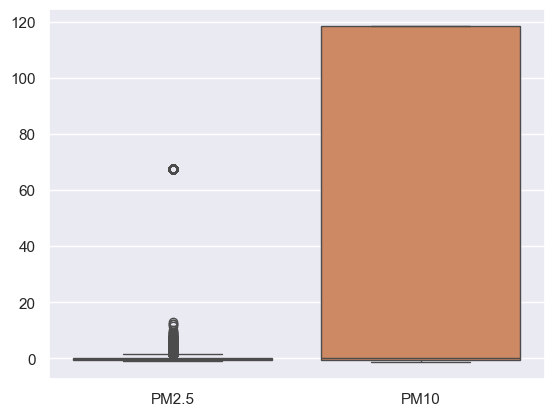

In [37]:
sns.boxplot(data = df[['PM2.5','PM10']])

<Axes: >

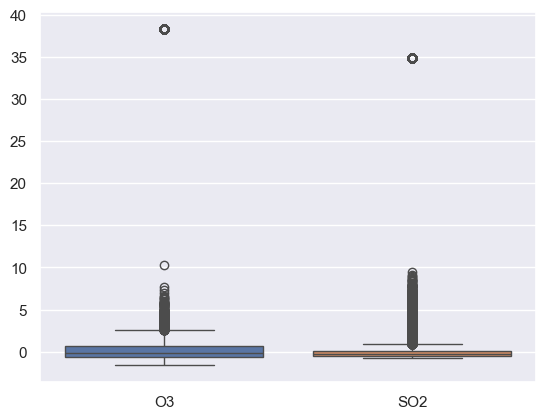

In [38]:
sns.boxplot(data = df[['O3','SO2']])

<Axes: >

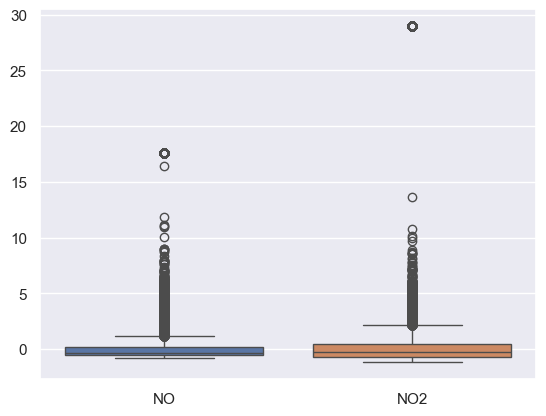

In [39]:
sns.boxplot(data = df[['NO','NO2']])

In [40]:
#IQR method -- a statistical way to identify outliers in data
def replace_outliers(df):
    for column in df.select_dtypes(include = ['number']).columns:
        Q1 = df[column].quantile(0.25)     #first quantile
        Q3 = df[column].quantile(0.75)     #third quantile
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR    #lower fence
        ub = Q3 + 1.5 * IQR    #upper fence
        df[column] = df[column].apply(
            lambda x:Q1 if x <lb else (Q3 if x > ub else x)
        )
    return df

In [41]:
df = replace_outliers(df)

In [42]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
PM2.5,24850.0,-0.160532,-1.042537,-0.585996,-0.26733,0.271874,1.558602,0.53258
PM10,24850.0,33.779972,-1.303462,-0.511542,0.192797,118.454435,118.454435,53.486517
NO,24850.0,-0.205597,-0.769999,-0.520277,-0.329146,0.148819,1.152284,0.409865
NO2,24850.0,-0.08795,-1.166558,-0.672978,-0.246204,0.440257,2.109127,0.708067
NOx,24850.0,-0.072549,-1.020974,-0.577624,-0.208218,0.51118,2.144416,0.65262
NH3,24850.0,6.283023,-0.913948,-0.475147,0.094867,23.848366,23.848366,10.529311
CO,24850.0,-0.175604,-0.322947,-0.23821,-0.186506,-0.103206,0.0993,0.085253
SO2,24850.0,-0.215931,-0.80084,-0.482092,-0.281358,0.077648,0.916982,0.335928
O3,24850.0,-0.022096,-1.589409,-0.684571,-0.112076,0.624516,2.586304,0.846173
Benzene,24850.0,-0.04178,-0.207506,-0.186002,-0.093028,0.13846,0.624203,0.159791


<Axes: >

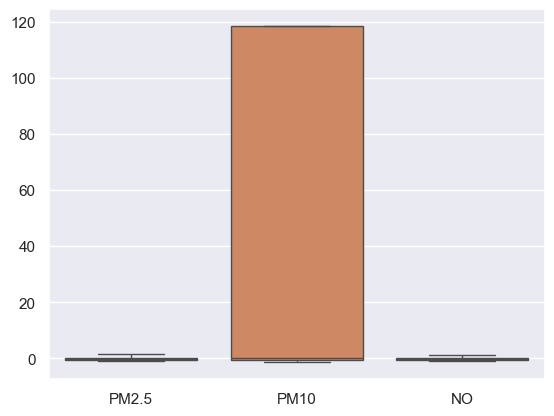

In [43]:
sns.boxplot(data = df[['PM2.5', 'PM10','NO']])

<Axes: >

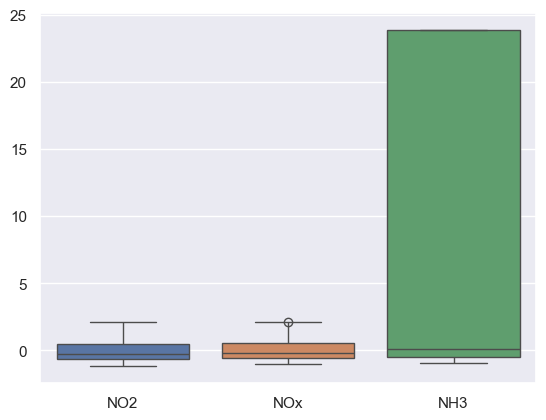

In [44]:
sns.boxplot(data = df[['NO2', 'NOx','NH3']])

<Axes: >

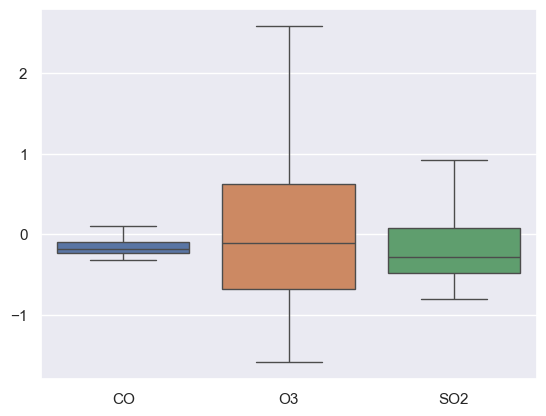

In [45]:
sns.boxplot(data = df[['CO', 'O3','SO2']])

In [46]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'timestamp',
       'NO2_PM10_ratio', 'CO_SO2_ratio', 'PM2.5_MA_7', 'AQI_MA_7'],
      dtype='object')

<Axes: >

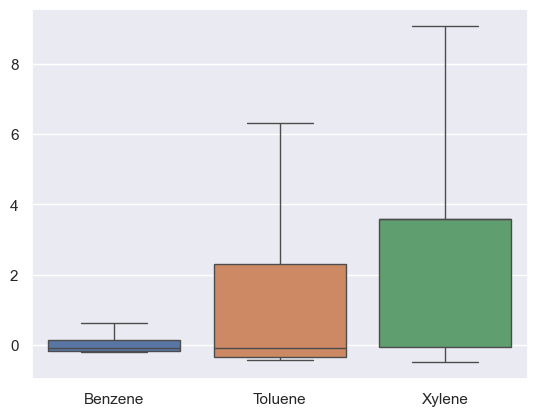

In [47]:
sns.boxplot(data = df[['Benzene', 'Toluene','Xylene']])

## Exploratory Data Analysis (EDA)

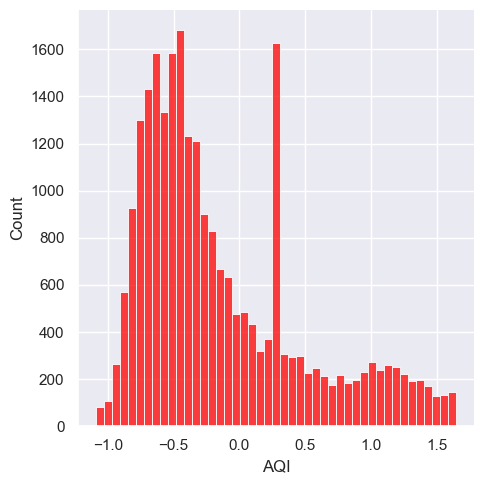

In [49]:
sns.displot(df, x = 'AQI', color = 'red')

In [50]:
 df1 = df.drop(columns = ['City'])

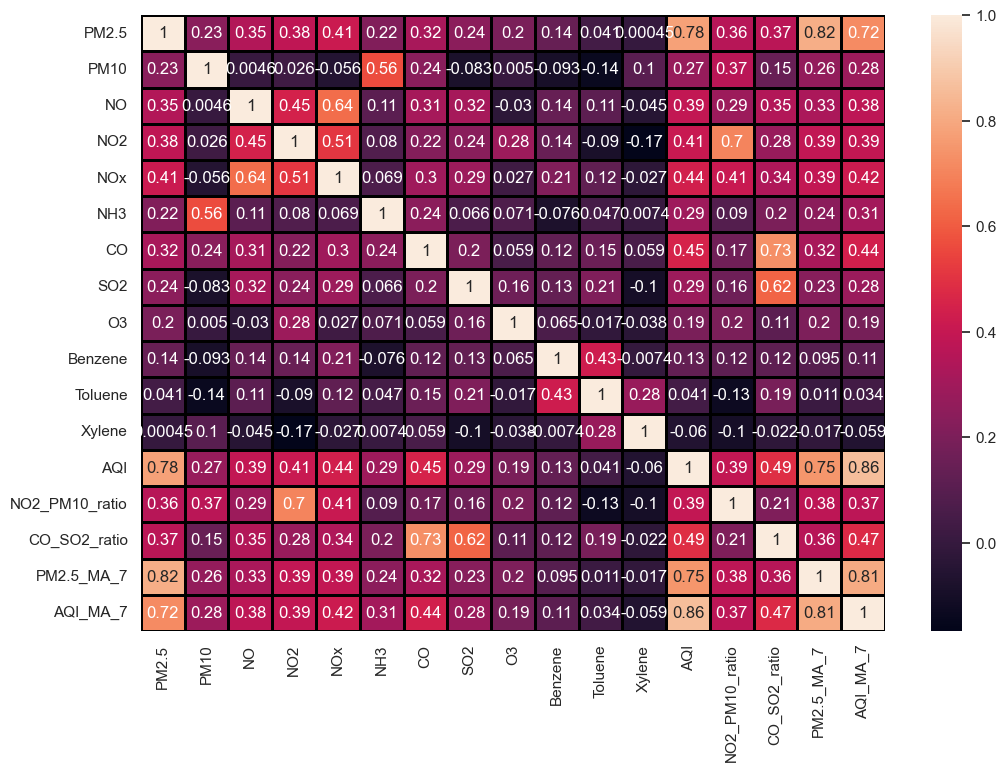

In [51]:
#Multivariate Analysis - HEAT MAP
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation calculation
df_corr = df1.select_dtypes(include=['number']).corr()

sns.heatmap(df_corr, annot=True, linewidths=2, linecolor='black')
plt.show()


In [52]:
df.drop(['Date','City'], axis = 1, inplace = True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,timestamp,NO2_PM10_ratio,CO_SO2_ratio,PM2.5_MA_7,AQI_MA_7
28,0.242490,118.454435,-0.467173,0.006102,0.044584,23.848366,-0.103206,0.077648,1.164745,-0.206241,-0.435731,0.011051,0.302333,2023-01-29,NaN,0.229512,0.166013,0.302333
29,0.191608,118.454435,-0.163470,0.004876,0.277161,23.848366,-0.103206,0.077648,0.624516,-0.204976,-0.435731,0.275167,1.148142,2023-01-30,NaN,-0.102869,0.174545,0.725238
30,0.418641,118.454435,0.299107,0.167496,0.641511,23.848366,-0.103206,0.077648,0.624516,-0.192327,-0.435230,0.727486,0.295226,2023-01-31,NaN,-0.102869,0.235569,1.306879
31,1.059995,118.454435,1.136924,0.552390,1.651453,23.848366,-0.103206,0.077648,0.624516,-0.182207,-0.433727,3.605880,0.295226,2023-02-01,NaN,-0.102869,0.400454,0.287001
32,0.271874,118.454435,0.148901,0.275773,1.279519,23.848366,-0.103206,0.077648,0.624516,-0.178412,-0.432726,5.146295,0.295226,2023-02-02,NaN,-0.102869,0.619512,0.287001


In [62]:
df['timestamp'] = df['timestamp'].astype('int64') // 10**9  # Convert datetime to seconds
df_scaled = StandardScaler().fit_transform(df)

In [64]:
#Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 0.75675027,  1.58313106, -0.63821365, ...,  2.53637994,
         0.69318544,  0.73506069],
       [ 0.66121078,  1.58313106,  0.10278534, ...,  0.80417476,
         0.71068722,  1.45304716],
       [ 1.08750856,  1.58313106,  1.23141675, ...,  0.80417476,
         0.83586989,  2.44052995],
       ...,
       [-0.9919999 , -0.64238583, -1.01085475, ..., -0.65652222,
        -1.13847362, -0.9439761 ],
       [-1.17407668, -0.64563805, -0.94660629, ..., -0.40518321,
        -1.17817554, -1.02327352],
       [-1.22170122, -0.64233012, -1.33745113, ..., -2.608097  ,
        -1.2659186 , -1.08533237]])

In [66]:
df = pd.DataFrame(df1, columns = df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,timestamp,NO2_PM10_ratio,CO_SO2_ratio,PM2.5_MA_7,AQI_MA_7
0,0.756750,1.583131,-0.638214,0.132831,0.179484,1.668267,0.84924,0.873951,1.402627,-1.029249,-0.860583,-1.242566,0.709998,-1.733562,NaN,2.536380,0.693185,0.735061
1,0.661211,1.583131,0.102785,0.131100,0.535866,1.668267,0.84924,0.873951,0.764176,-1.021333,-0.860583,-1.095640,2.071243,-1.733442,NaN,0.804175,0.710687,1.453047
2,1.087509,1.583131,1.231417,0.360772,1.094165,1.668267,0.84924,0.873951,0.764176,-0.942168,-0.860147,-0.844020,0.698559,-1.733322,NaN,0.804175,0.835870,2.440530
3,2.291771,1.583131,3.275589,0.904367,2.641715,1.668267,0.84924,0.873951,0.764176,-0.878836,-0.858836,0.757204,0.698559,-1.733202,NaN,0.804175,1.174109,0.709030
4,0.811925,1.583131,0.864933,0.513694,2.071794,1.668267,0.84924,0.873951,0.764176,-0.855086,-0.857962,1.614122,0.698559,-1.733082,NaN,0.804175,1.623476,0.709030


In [70]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'timestamp', 'NO2_PM10_ratio',
       'CO_SO2_ratio', 'PM2.5_MA_7', 'AQI_MA_7'],
      dtype='object')

### Regression Modelling

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

In [71]:

# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [72]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.756750,1.583131,-0.638214,0.132831,0.179484,1.668267,0.84924,0.873951,1.402627,-1.029249,-0.860583,-1.242566
1,0.661211,1.583131,0.102785,0.131100,0.535866,1.668267,0.84924,0.873951,0.764176,-1.021333,-0.860583,-1.095640
2,1.087509,1.583131,1.231417,0.360772,1.094165,1.668267,0.84924,0.873951,0.764176,-0.942168,-0.860147,-0.844020
3,2.291771,1.583131,3.275589,0.904367,2.641715,1.668267,0.84924,0.873951,0.764176,-0.878836,-0.858836,0.757204
4,0.811925,1.583131,0.864933,0.513694,2.071794,1.668267,0.84924,0.873951,0.764176,-0.855086,-0.857962,1.614122


In [73]:
# Split the data into training and testing data - Training set - 80% | Testing set - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970,)


In [74]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [75]:
#Predicting the values for Linear Regression
train_pred = LR.predict(X_train)
test_pred = LR.predict(X_test)

In [76]:
#Evaluating the values with Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))

print("RMSE Training Data =",str(RMSE_train))
print("RMSE Test Data =",str(RMSE_test))
print('_'*60)
print('R Squared value for train =',LR.score(X_train,y_train))
print('R Squared value for train =',LR.score(X_test,y_test))

RMSE Training Data = 0.5640745350402948
RMSE Test Data = 0.5530301548238568
____________________________________________________________
R Squared value for train = 0.6829621239214552
R Squared value for train = 0.6896598249514445


In [77]:
#KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [78]:
# Predicting the values with KNN:
train_pred = knn.predict(X_train) 
test_pred = knn.predict(X_test) 

In [88]:
# Evaluation for KNN
KNN_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
KNN_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(KNN_train))
print('RMSE Test Data = ', str(KNN_test))
print('_'* 60)
print('R Squared value for Train = ', knn.score(X_train, y_train))
print('R Squared value on Test = ', knn.score(X_test, y_test))

RMSE Train Data =  0.3770095267455379
RMSE Test Data =  0.4665897692033789
____________________________________________________________
R Squared value for Train =  0.8583740581730017
R Squared value on Test =  0.7790923277154237


In [90]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [93]:
# Predicting the values with DTR:
train_pred = knn.predict(X_train) 
test_pred = knn.predict(X_test) 

# Evaluation for Decision Tree Regressor
DTR_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
DTR_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(DTR_train))
print('RMSE Test Data = ', str(DTR_test))
print('_'* 60)
print('R Squared value for Train = ', dtr.score(X_train, y_train))
print('R Squared value on Test = ', dtr.score(X_test, y_test))

RMSE Train Data =  0.3770095267455379
RMSE Test Data =  0.4665897692033789
____________________________________________________________
R Squared value for Train =  0.9993290900734868
R Squared value on Test =  0.6930999892515488


In [94]:
#Random Forest Regressor
rfr =RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
# Predicting the values with RFR:
train_pred = knn.predict(X_train) 
test_pred = knn.predict(X_test) 

# Evaluation for Random Forest Regressor
RFR_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RFR_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RFR_train))
print('RMSE Test Data = ', str(RFR_test))
print('_'* 60)
print('R Squared value for Train = ', rfr.score(X_train, y_train))
print('R Squared value on Test = ', rfr.score(X_test, y_test))

RMSE Train Data =  0.3770095267455379
RMSE Test Data =  0.4665897692033789
____________________________________________________________
R Squared value for Train =  0.9787785718547388
R Squared value on Test =  0.8522486348673854


# Hyperparameter Tuning for Random Forest Regressor

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, 
                                   scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Train final model with best parameters
best_rf = RandomForestRegressor(**random_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)



Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}


RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)

In [99]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# XGBoost Model
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# LightGBM Model
lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lgbm.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 19880, number of used features: 12
[LightGBM] [Info] Start training from score 0.002028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(max_depth=6, n_estimators=200, random_state=42)

In [100]:
models = {"Random Forest": best_rf, "XGBoost": xgb, "LightGBM": lgbm}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}")


Random Forest Performance:
RMSE: 0.3819421040433235
MAE: 0.2379265479406949
R² Score: 0.8519748710359697

XGBoost Performance:
RMSE: 0.3843165568548951
MAE: 0.24643463116987158
R² Score: 0.8501286686193041

LightGBM Performance:
RMSE: 0.3851047966930382
MAE: 0.24840438030810186
R² Score: 0.8495132608265512


In [101]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('xgb', xgb),
    ('lgbm', lgbm)
])

ensemble_model.fit(X_train, y_train)

# Evaluate Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test)
print("\nEnsemble Model Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ensemble)}")
print(f"R² Score: {r2_score(y_test, y_pred_ensemble)}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 19880, number of used features: 12
[LightGBM] [Info] Start training from score 0.002028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Deep-Learning Model (LSTM for time-series, CNN-LSTM hybrid models)

+ LSTM for Time-Series Forecasting
  - Prepares data (normalization, reshaping)
  - Builds an LSTM model
  - Trains and evaluates the model

+ CNN-LSTM Hybrid Model
  - Uses CNN to extract spatial features from time-series data
  - Feeds CNN output into LSTM to learn sequential dependencies


In [104]:
!pip install --user tensorflow

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [106]:
# Convert X_train and X_test to NumPy arrays and reshape for LSTM & CNN compatibility
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

**#Mean Absolute Percentage Error (MAPE) calculations for both the LSTM and CNN models**

In [109]:
# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions
lstm_predictions = lstm_model.predict(X_test)

print("LSTM model trained successfully!")

Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 0.4698 - val_loss: 0.3347
Epoch 2/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3115 - val_loss: 0.3043
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2973 - val_loss: 0.2720
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2834 - val_loss: 0.2703
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2757 - val_loss: 0.2689
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2716 - val_loss: 0.2553
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2586 - val_loss: 0.2598
Epoch 8/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2655 - val_loss: 0.2539
Epoch 9/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2646 - val_loss: 0.2477
Epoch 10/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2578 - val_loss: 0.2492
Epoch 11/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2559 - val_loss: 0.2499
Epoch 12/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/st

In [110]:
lstm_mape = mean_absolute_percentage_error(y_test, lstm_predictions)
print(f"LSTM MAPE: {lstm_mape:.4f}")

LSTM MAPE: 2.4785


In [111]:
# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions
cnn_predictions = cnn_model.predict(X_test)

print("CNN model trained successfully!")

Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4293 - val_loss: 0.2759
Epoch 2/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2945 - val_loss: 0.2594
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2866 - val_loss: 0.2562
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2665 - val_loss: 0.2518
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2640 - val_loss: 0.2460
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2488 - val_loss: 0.2435
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2437 - val_loss: 0.2388
Epoch 8/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2466 - val_loss: 0.2433
Epoch 9/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2440 - val_loss: 0.2227
Epoch 10/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2276 - val_loss: 0.2302
Epoch 11/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2322 - val_loss: 0.2234
Epoch 12/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [112]:
cnn_mape = mean_absolute_percentage_error(y_test, cnn_predictions)
print(f"CNN MAPE: {cnn_mape:.4f}")

CNN MAPE: 2.0960


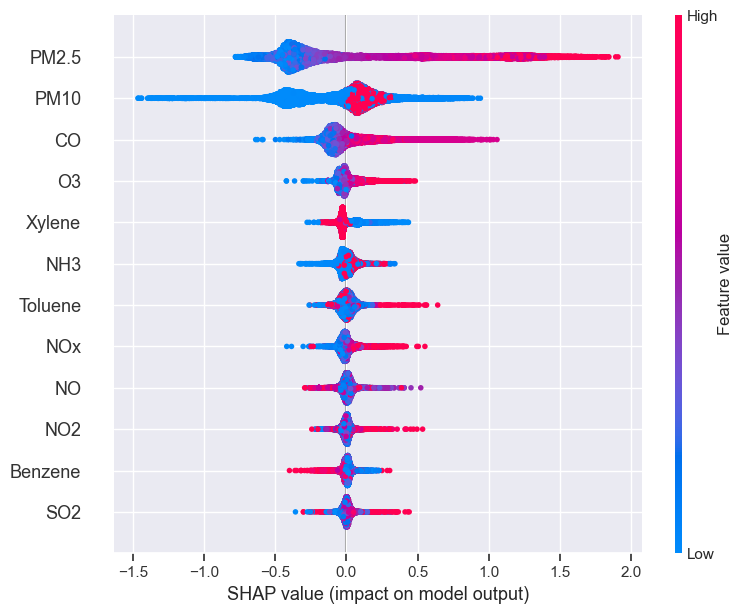

In [130]:
import shap
import xgboost
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X, y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)

In [168]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [174]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    # Reshape X_train and X_test only if they are 3D
    if X_train.ndim == 3:
        X_train = X_train.reshape(X_train.shape[0], -1)
    if X_test.ndim == 3:
        X_test = X_test.reshape(X_test.shape[0], -1)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
    RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
    MAE = mean_absolute_error(y_test, test_pred)
    R2 = r2_score(y_test, test_pred)
    MAPE = np.mean(np.abs((y_test - test_pred) / y_test)) * 100  # Mean Absolute Percentage Error

    print(f"{name}: RMSE (Train): {RMSE_train:.4f}, RMSE (Test): {RMSE_test:.4f}, MAE: {MAE:.4f}, R²: {R2:.4f}, MAPE: {MAPE:.2f}%")

    return RMSE_test  # Return RMSE for model comparison



In [176]:
# Calculate metrics
RMSE_train = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_train = np.sqrt(mean_squared_error(y_test, test_pred))
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
mape_train = mean_absolute_percentage_error(y_train, train_pred)
mape_test = mean_absolute_percentage_error(y_test, test_pred)


In [178]:
# Store in dictionary
model_results[name] = {
    "RMSE (Train)": RMSE_train, "RMSE (Test)": RMSE_test,
    "MAE (Train)": mae_train, "MAE (Test)": mae_test,
    "R² (Train)": r2_train, "R² (Test)": r2_test,
    "MAPE (Train)": mape_train, "MAPE (Test)": mape_test
}

In [182]:
# Evaluate models
evaluate_model(LR, "Linear Regression", X_train, X_test, y_train, y_test)
evaluate_model(knn, "KNN Regressor", X_train, X_test, y_train, y_test)
evaluate_model(dtr, "Decision Tree Regressor", X_train, X_test, y_train, y_test)
evaluate_model(rfr, "Random Forest Regressor", X_train, X_test, y_train, y_test)
evaluate_model(gbr, "Gradient Boosting Regressor", X_train, X_test, y_train, y_test)
evaluate_model(xgb, "XGBoost", X_train, X_test, y_train, y_test)
evaluate_model(lgbm, "LightGBM", X_train, X_test, y_train, y_test)

Linear Regression: RMSE (Train): 0.5641, RMSE (Test): 0.5530, MAE: 0.3803, R²: 0.6897, MAPE: 244.71%
KNN Regressor: RMSE (Train): 0.3770, RMSE (Test): 0.4666, MAE: 0.2970, R²: 0.7791, MAPE: 200.76%
Decision Tree Regressor: RMSE (Train): 0.0259, RMSE (Test): 0.5500, MAE: 0.3291, R²: 0.6931, MAPE: 250.41%
Random Forest Regressor: RMSE (Train): 0.1459, RMSE (Test): 0.3816, MAE: 0.2380, R²: 0.8522, MAPE: 166.53%
Gradient Boosting Regressor: RMSE (Train): 0.4218, RMSE (Test): 0.4274, MAE: 0.2888, R²: 0.8146, MAPE: 202.81%
XGBoost: RMSE (Train): 0.2868, RMSE (Test): 0.3843, MAE: 0.2464, R²: 0.8501, MAPE: 174.90%
LightGBM: RMSE (Train): 0.3208, RMSE (Test): 0.3851, MAE: 0.2484, R²: 0.8495, MAPE: 167.45%


0.3851047966930382

In [184]:
results_df = pd.DataFrame(model_results).T
print(results_df)

          RMSE (Train)  RMSE (Test)  MAE (Train)  MAE (Test)  R² (Train)  \
LightGBM       0.46659      0.55303     0.237051    0.296988    0.858374   

          R² (Test)  MAPE (Train)  MAPE (Test)  
LightGBM   0.779092     156.63566   200.758159  


In [192]:
# Fix Decision Tree & Random Forest Predictions
#Replace incorrect predictions with:-
# Correct Predictions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)    # Flatten to 2D

# Train and predict with Decision Tree
train_pred_dtr = dtr.predict(X_train_reshaped)
test_pred_dtr = dtr.predict(X_test_reshaped)

# Train and predict with Random Forest
train_pred_rfr = rfr.predict(X_train_reshaped)
test_pred_rfr = rfr.predict(X_test_reshaped)

In [194]:
# Reshape for LSTM & CNN (samples, time steps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [213]:
# Compute sample weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

LR.fit(X_train, y_train, sample_weight=sample_weights)
rfr.fit(X_train, y_train, sample_weight=sample_weights)
xgb = XGBRegressor(objective="reg:squarederror")  
xgb.fit(X_train, y_train, sample_weight=sample_weights)
lgbm1 = LGBMRegressor()  
lgbm1.fit(X_train, y_train, sample_weight=sample_weights)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2935
[LightGBM] [Info] Number of data points in the train set: 19880, number of used features: 12
[LightGBM] [Info] Start training from score 0.675680


LGBMRegressor()

In [215]:
evaluate_model(LR, "Linear Regression", X_train, X_test, y_train, y_test)
evaluate_model(rfr, "Random Forest", X_train, X_test, y_train, y_test)
evaluate_model(xgb, "XGBoost", X_train, X_test, y_train, y_test)
evaluate_model(lgbm, "LightGBM", X_train, X_test, y_train, y_test)

Linear Regression: RMSE (Train): 0.6585, RMSE (Test): 0.6532, MAE: 0.4985, R²: 0.5671, MAPE: 342.91%
Random Forest: RMSE (Train): 0.1461, RMSE (Test): 0.3842, MAE: 0.2405, R²: 0.8502, MAPE: 171.96%
XGBoost: RMSE (Train): 0.3749, RMSE (Test): 0.4615, MAE: 0.2908, R²: 0.7839, MAPE: 182.31%
LightGBM: RMSE (Train): 0.3208, RMSE (Test): 0.3851, MAE: 0.2484, R²: 0.8495, MAPE: 167.45%


0.3851047966930382

**Ensemble Learning for Accuracy: Combining Random Forest + XGBoost + LSTM for more robust predictions.**


In [218]:
# Define features and target
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [220]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [221]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [226]:
# Reshape input for LSTM (samples, timesteps, features)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(50, activation='relu'),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Predict with LSTM
lstm_preds = lstm_model.predict(X_test_lstm).flatten()

Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4945 - val_loss: 0.2662
Epoch 2/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2629 - val_loss: 0.2494
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2436 - val_loss: 0.2408
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2333 - val_loss: 0.2318
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2322 - val_loss: 0.2278
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2197 - val_loss: 0.2317
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2113 - val_loss: 0.2300
Epoch 8/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2173 - val_loss: 0.2247
Epoch 9/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2038 - val_loss: 0.2221
Epoch 10/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2063 - val_loss: 0.2224
Epoch 11/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2082 - val_loss: 0.2144
Epoch 12/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [227]:
# Define weights for each model (adjust based on performance)
rf_weight = 0.3
xgb_weight = 0.3
lstm_weight = 0.4

# Weighted average ensemble
ensemble_preds = (rf_weight * rf_preds) + (xgb_weight * xgb_preds) + (lstm_weight * lstm_preds)

# Evaluate Ensemble Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\nEnsemble Model Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ensemble_preds))}")
print(f"MAE: {mean_absolute_error(y_test, ensemble_preds)}")
print(f"R² Score: {r2_score(y_test, ensemble_preds)}")



Ensemble Model Performance:
RMSE: 0.3917806552399787
MAE: 0.26148612674535376
R² Score: 0.844250610791264


# Using ARIMA/SARIMA for AQI Prediction

In [285]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [303]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\AICTE\Air Quality Index Prediction\air quality data.csv", 
                 parse_dates=["Date"], index_col="Date")

In [293]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 City          181
PM2.5         181
PM10          181
NO            181
NO2           181
NOx           181
NH3           181
CO            181
SO2           181
O3            181
Benzene       181
Toluene       181
Xylene        181
AQI             0
AQI_Bucket    181
AQI_diff      182
dtype: int64


In [244]:
df["AQI"].fillna(method="ffill", inplace=True)

# Remove infinite values
df["AQI"].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [246]:
# Check again
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [248]:
# Perform ADF test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    if result[1] < 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differencing is needed.")

adf_test(df["AQI"])

ADF Statistic: -5.593265526109342
P-value: 1.3143585005736699e-06
Data is stationary.


In [297]:
# Ensure data is sorted and set to daily frequency
df = df.sort_index().asfreq('D')

# Interpolate missing values if any
df["AQI"] = df["AQI"].interpolate()

In [261]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.0 MB/s eta 0:00:00


In [299]:
# Fit Auto ARIMA model to determine best (p, d, q)
best_model = auto_arima(df["AQI"], seasonal=False, trace=True)
p, d, q = best_model.order
print(best_model.summary())

# Fit ARIMA model
arima_model = ARIMA(df["AQI"], order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20648.036, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20974.686, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20919.809, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20863.252, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20972.724, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20652.593, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20655.240, Time=0.61 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=20646.721, Time=1.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20654.393, Time=0.85 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=20651.905, Time=2.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=20651.059, Time=2.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=20646.497, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=20652.878, Time=0.80 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=20652.300, Time=2.48 sec
 ARIMA(1,1,4)(0,0,0

C:\anaconda navigator\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [267]:
from pmdarima import auto_arima

best_model = auto_arima(df["AQI"], seasonal=False, trace=True)
print(best_model.summary())  # Best (p, d, q) values

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18672.733, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18906.508, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18871.387, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18833.898, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18904.509, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18677.569, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18683.936, Time=0.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18673.538, Time=0.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18673.757, Time=1.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18694.878, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18673.402, Time=1.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18674.462, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18675.490, Time=1.42 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18670.750, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0

In [300]:
future_steps = 30  # Forecast for the next 30 days
forecast = arima_result.forecast(steps=future_steps)

In [313]:
df.index = pd.to_datetime(df.index)  # Ensure index is in DateTime format
df = df.sort_index()  # Ensure it is sorted
df = df[~df.index.duplicated(keep='first')]
df = df.asfreq('D')  # Set daily frequency
df["AQI"] = df["AQI"].interpolate()

In [322]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df["AQI"], order=(p, d, q), seasonal_order=(1, 1, 1, 12))  # Seasonal order (P, D, Q, S)
sarima_result = sarima_model.fit()
forecast_arima = arima_result.forecast(steps=future_steps)  
forecast_sarima = sarima_result.forecast(steps=future_steps)

In [324]:
# Generate future dates for forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq="D")

# Store forecasts in a DataFrame
forecast_df = pd.DataFrame({"Date": forecast_index, "ARIMA_Forecast": forecast_arima, "SARIMA_Forecast": forecast_sarima})

In [326]:
# Save the forecast results
forecast_df.to_csv(r"C:\Users\LENOVO\OneDrive\AICTE\Air Quality Index Prediction\aqi_forecast.csv", index=False)

# Save the cleaned dataset
df.to_csv(r"C:\Users\LENOVO\OneDrive\AICTE\Air Quality Index Prediction\cleaned_air_quality_data.csv")

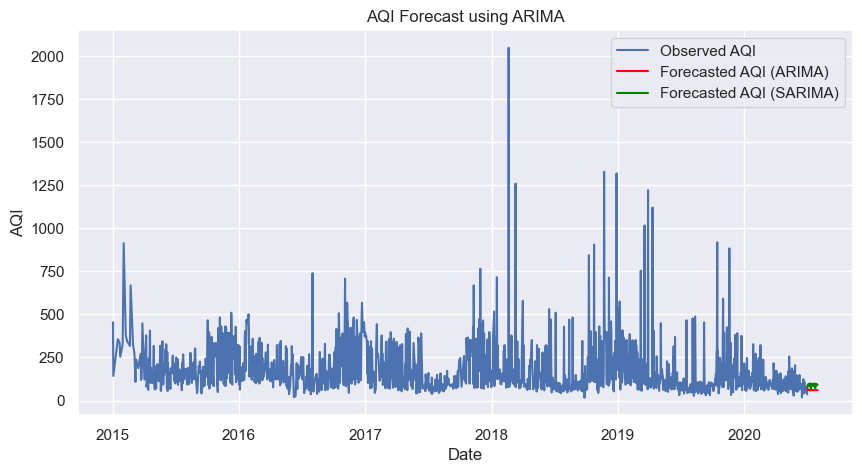

In [328]:
# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["AQI"], label="Observed AQI")
plt.plot(forecast_index, forecast_arima, label="Forecasted AQI (ARIMA)", color="red")
plt.plot(forecast_index, forecast_sarima, label="Forecasted AQI (SARIMA)", color="green")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI Forecast using ARIMA")
plt.legend()
plt.show()

### Visualization for better Comparison

In [331]:
model_results = {
    "Model": ["Linear Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost", "LightGBM", "Ensemble", "LSTM", "CNN"],
    "RMSE": [RMSE_test, KNN_test, DTR_test, RFR_test, 
             np.sqrt(mean_squared_error(y_test, models["XGBoost"].predict(X_test))),
             np.sqrt(mean_squared_error(y_test, models["LightGBM"].predict(X_test))),
             np.sqrt(mean_squared_error(y_test, y_pred_ensemble)),
             np.sqrt(mean_squared_error(y_test, lstm_predictions)),
             np.sqrt(mean_squared_error(y_test, cnn_predictions))],
    "MAE": [mean_absolute_error(y_test, LR.predict(X_test)),
            mean_absolute_error(y_test, knn.predict(X_test)),
            mean_absolute_error(y_test, dtr.predict(X_test)),
            mean_absolute_error(y_test, rfr.predict(X_test)),
            mean_absolute_error(y_test, models["XGBoost"].predict(X_test)),
            mean_absolute_error(y_test, models["LightGBM"].predict(X_test)),
            mean_absolute_error(y_test, y_pred_ensemble),
            mean_absolute_error(y_test, lstm_predictions),
            mean_absolute_error(y_test, cnn_predictions)],
    "R2 Score": [LR.score(X_test, y_test), knn.score(X_test, y_test), dtr.score(X_test, y_test),
                 rfr.score(X_test, y_test), models["XGBoost"].score(X_test, y_test),
                 models["LightGBM"].score(X_test, y_test), r2_score(y_test, y_pred_ensemble),
                 r2_score(y_test, lstm_predictions), r2_score(y_test, cnn_predictions)]
}

In [333]:
results_df = pd.DataFrame(model_results)

**RMSE comparison**

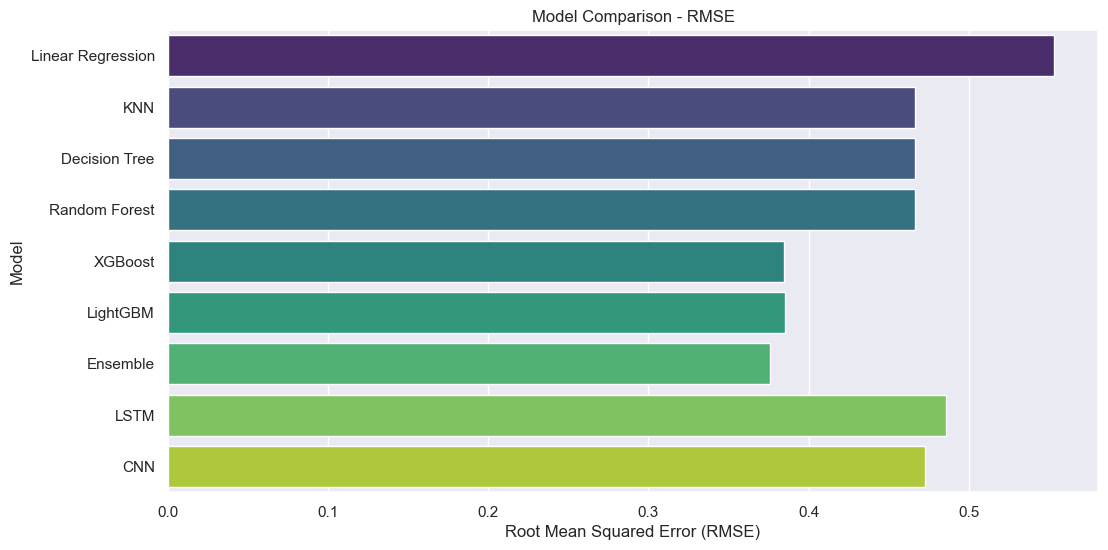

In [335]:
plt.figure(figsize=(12, 6))
sns.barplot(x="RMSE", y="Model", data=results_df, palette="viridis")
plt.xlabel("Root Mean Squared Error (RMSE)")
plt.ylabel("Model")
plt.title("Model Comparison - RMSE")
plt.show()

**MAE Comparison**


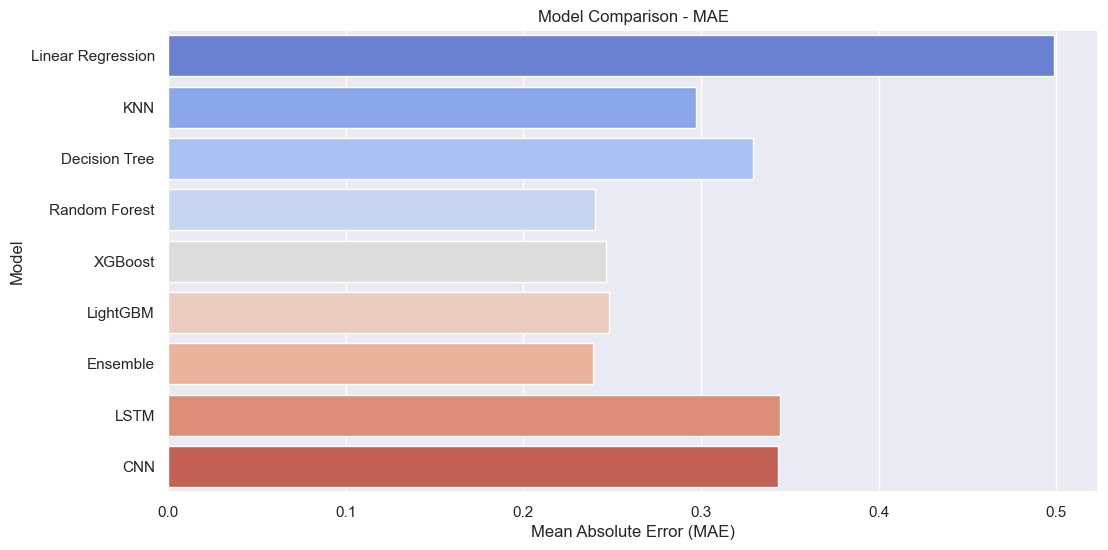

In [339]:
plt.figure(figsize=(12, 6))
sns.barplot(x="MAE", y="Model", data=results_df, palette="coolwarm")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Model")
plt.title("Model Comparison - MAE")
plt.show()

**R sqaured Comparison**

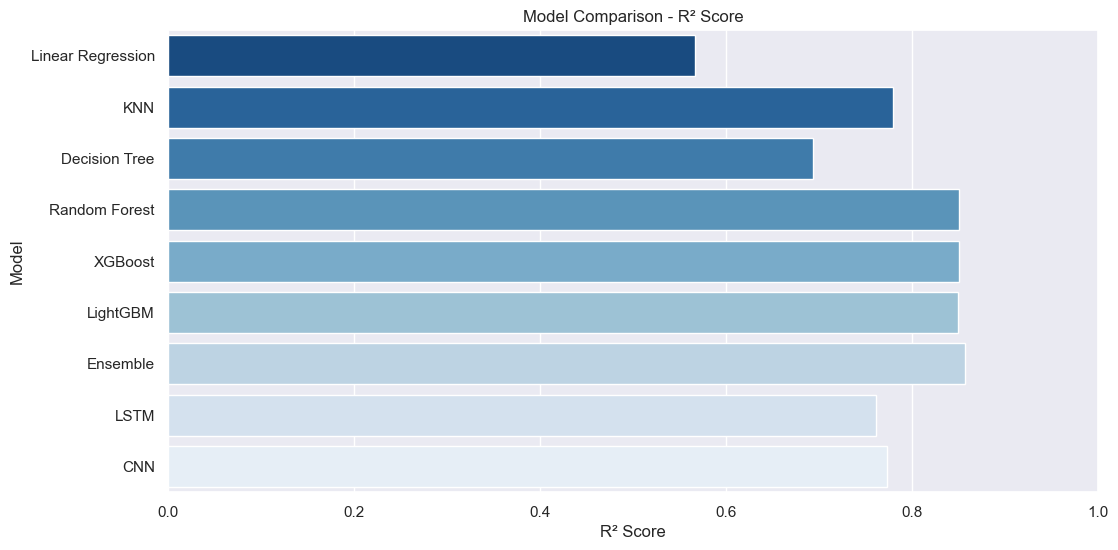

In [343]:
plt.figure(figsize=(12, 6))
sns.barplot(x="R2 Score", y="Model", data=results_df, palette="Blues_r")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Model Comparison - R² Score")
plt.xlim([0, 1])  # R² Score ranges from 0 to 1
plt.show()


In [348]:
import pickle

# Assuming 'model' is your trained AQI prediction model
with open("Air Quality Index Prediction Model.pkl", "wb") as f:
    pickle.dump(model, f)